In [1]:
!python --version

Python 3.11.9


In [2]:
!pip install matplotlib
!pip install seaborn
!pip install spicy

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/104.0 kB ? eta -:--:--
     ---------- -------------------------- 30.7/104.0 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 104.0/104.0 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB ? eta 0:00:00
  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 13.8 MB/s eta 0:00:01
   ------- -------------------------------- 1.4/8.0 MB 17.8 MB/s eta 0:00:01
   ------------ --------------------------- 2.6/8.0 MB 18

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
import seaborn as sns  
import warnings
import scipy.stats as stats 

In [3]:
# Load the dataset
df = pd.read_csv("data/Bank_Transaction_Fraud_Detection.csv")

# Display first few rows
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,CUST000001,Customer_1,Male,25,CA,Los Angeles,Branch B,Checking,TXN000000001,2023-01-01 00:00:00,...,Clothing,1760.420524,POS Terminal,CA,Windows PC,0,USD,+1-240-2997,Gift,customer2148@bank.com
1,CUST000002,Customer_2,Female,58,FL,New York,Branch C,Savings,TXN000000002,2023-01-01 00:01:00,...,Luxury,7833.088780,Web,TX,Android,0,USD,+1-641-1940,Payment,customer8393@bank.com
2,CUST000003,Customer_3,Female,71,PA,Dallas,Branch A,Savings,TXN000000003,2023-01-01 00:02:00,...,Travel,7239.890561,POS Terminal,IL,Windows PC,0,EUR,+1-685-4317,Subscription,customer8594@bank.com
3,CUST000004,Customer_4,Female,27,NY,Chicago,Branch A,Savings,TXN000000004,2023-01-01 00:03:00,...,Clothing,4269.744125,POS Terminal,CA,Windows PC,0,CAD,+1-650-5207,Subscription,customer1396@bank.com
4,CUST000005,Customer_5,Male,28,OH,Philadelphia,Branch B,Savings,TXN000000005,2023-01-01 00:04:00,...,Electronics,4877.511195,Web,PA,Linux,0,CAD,+1-995-5816,Gift,customer1126@bank.com


In [6]:
df.shape

(200000, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  object 
 10  Transaction_Time         200000 non-null  object 
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null  object 
 14  Merc

In [8]:
df.isnull().sum()

Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,Age,Transaction_Amount,Account_Balance,Is_Fraud
count,200000.000000,200000.000000,200000.000000,200000.000000
mean,48.469710,105.032620,4995.865781,0.070000
std,17.896964,210.894961,1990.914559,0.255148
min,18.000000,5.000000,0.000000,0.000000
25%,33.000000,31.508303,3646.620917,0.000000
50%,48.000000,52.831014,4987.400530,0.000000
75%,64.000000,75.871259,6343.998115,0.000000
max,79.000000,1897.869419,13631.898149,1.000000


In [11]:
df['Is_Fraud'].value_counts(normalize=True) * 100  # Check fraud percentage

Is_Fraud
0    93.0
1     7.0
Name: proportion, dtype: float64

The fraud distribution shows that 7% of transactions are fraudulent, while 93% are non-fraudulent. This indicates a significant class imbalance, which may affect the model’s ability to detect fraudulent transactions accurately.

In [12]:
df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'])

def categorize_time(time):
    hour = time.hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Transaction_Time'] = df['Transaction_Time'].apply(categorize_time)

C:\Users\Palvi\AppData\Local\Temp\ipykernel_24204\2493909172.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'])


In [14]:
df['Transaction_Time'].unique()

array(['Night', 'Morning', 'Afternoon', 'Evening'], dtype=object)

In [16]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df['Transaction_year'] = df['Transaction_Date'].dt.year
df['Transaction_month'] = df['Transaction_Date'].dt.month_name()
df['Transaction_day'] = df['Transaction_Date'].dt.day_name()

# Univariate Analysis

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Transaction_Date'}>],
       [<Axes: title={'center': 'Transaction_Amount'}>,
        <Axes: title={'center': 'Account_Balance'}>],
       [<Axes: title={'center': 'Is_Fraud'}>,
        <Axes: title={'center': 'Transaction_year'}>]], dtype=object)

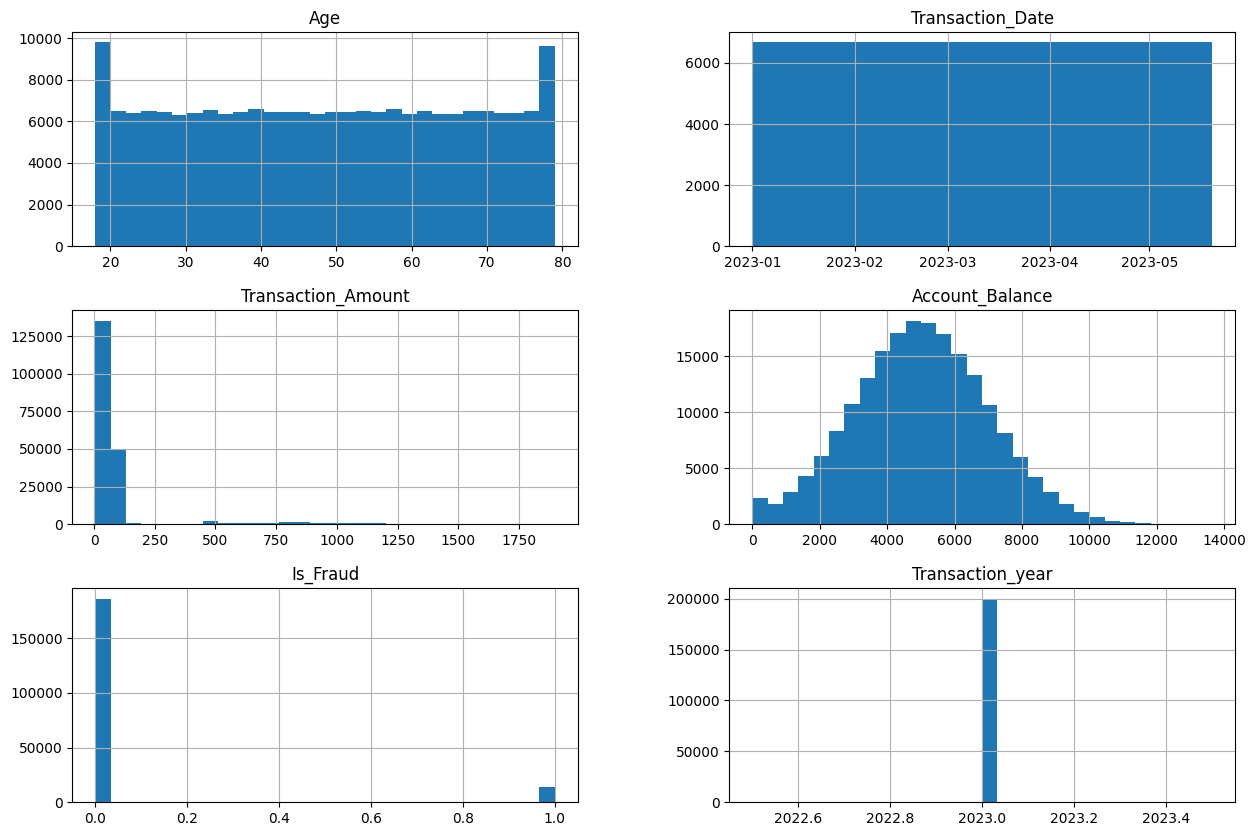

In [17]:
df.hist(figsize=(15, 10), bins=30)

- Age: The distribution is relatively uniform, with spikes at the lower and upper age ranges.
- Transaction Date: Transactions are evenly spread over the recorded time period.
- Transaction Amount: Most transactions are of low amounts, with a heavy right skew indicating a few high-value transactions.
- Account Balance: The distribution is approximately normal, with most balances centered around the middle range.
- Is Fraud: The dataset is highly imbalanced, with significantly more non-fraudulent transactions than fraudulent ones.
- Transaction Year: Most transactions occur within a single year, suggesting a limited time frame for the dataset.

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

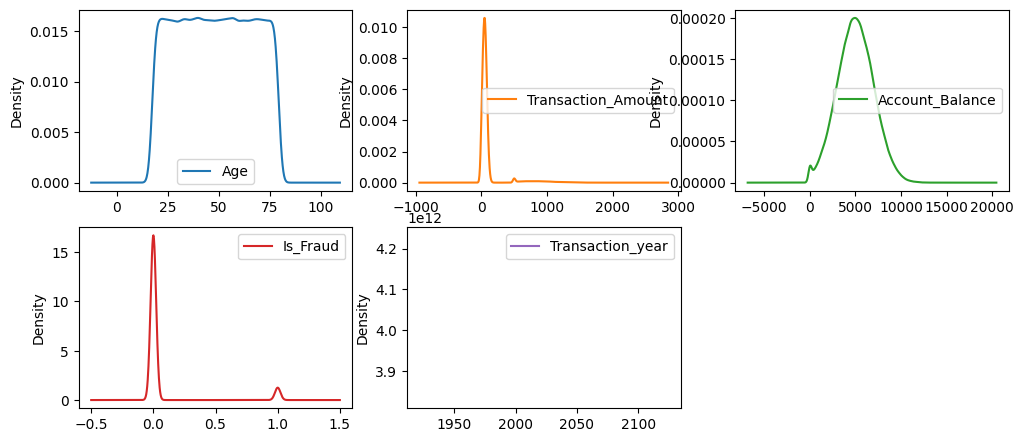

In [19]:
df.select_dtypes(include=['number']).plot(kind='density', subplots=True, layout=(3,3), figsize=(12,8), sharex=False)

<Axes: ylabel='count'>

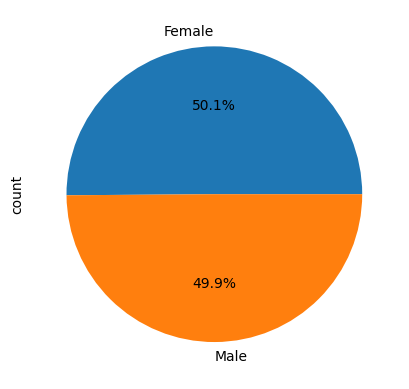

In [20]:
df["Gender"].value_counts().plot.pie(autopct="%1.1f%%") 

<Axes: ylabel='count'>

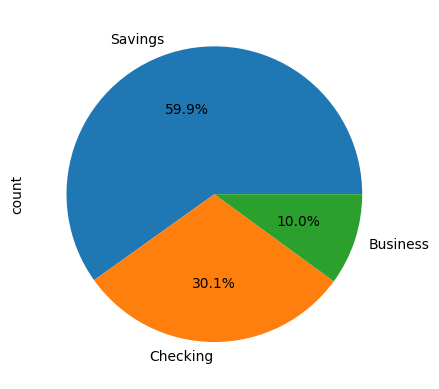

In [21]:
df["Account_Type"].value_counts().plot.pie(autopct="%1.1f%%") 

<Axes: ylabel='count'>

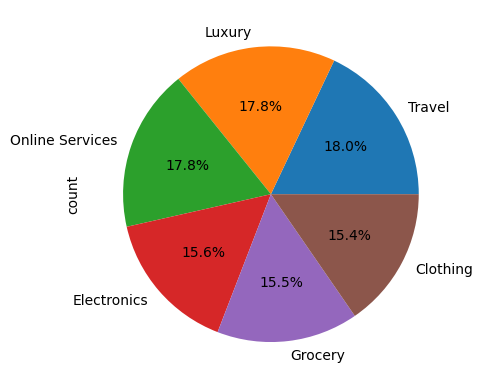

In [22]:
df["Merchant_Category"].value_counts().plot.pie(autopct="%1.1f%%")

<Axes: ylabel='count'>

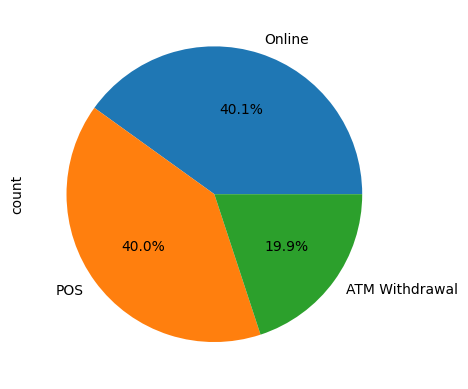

In [23]:
df["Transaction_Type"].value_counts().plot.pie(autopct="%1.1f%%") 

<Axes: ylabel='count'>

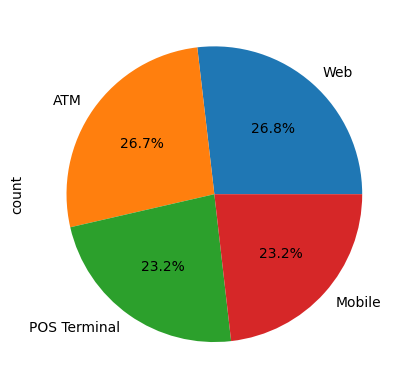

In [24]:
df["Transaction_Device"].value_counts().plot.pie(autopct="%1.1f%%") 

<Axes: ylabel='count'>

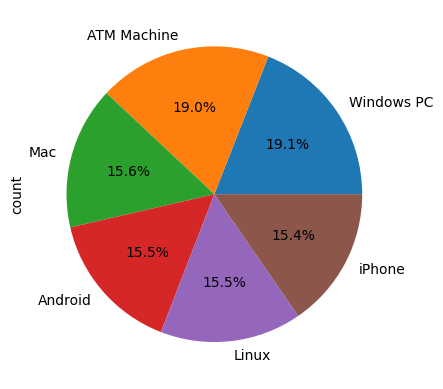

In [25]:
df["Device_Type"].value_counts().plot.pie(autopct="%1.1f%%") 

<Axes: ylabel='count'>

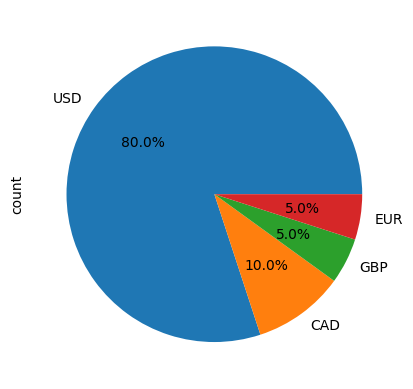

In [26]:
df["Transaction_Currency"].value_counts().plot.pie(autopct="%1.1f%%") 

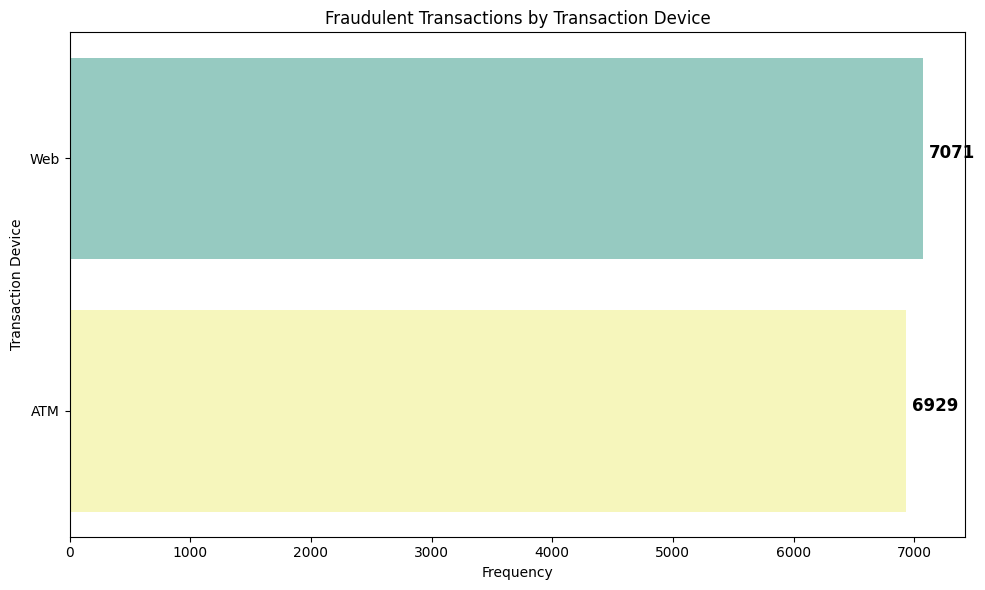

In [30]:
fraud_df = df[df['Is_Fraud'] == 1]
fraud_counts = fraud_df['Transaction_Device'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=fraud_counts.index, x=fraud_counts.values, hue=fraud_counts.index, palette="Set3", legend=False)
plt.xlabel("Frequency")
plt.ylabel("Transaction Device")
plt.title("Fraudulent Transactions by Transaction Device")
for index, value in enumerate(fraud_counts.values):
    ax.text(value + 50, index, f"{value}", fontsize=12, fontweight="bold", ha="left")
plt.tight_layout()
plt.show()


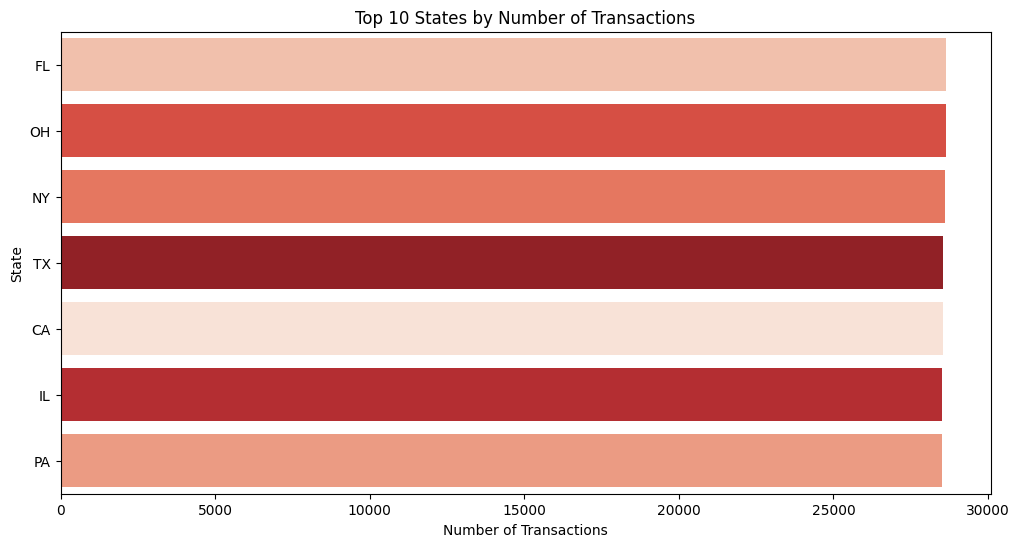

In [33]:
# Transactions by State
plt.figure(figsize=(12, 6))
sns.countplot(y=df['State'], order=df['State'].value_counts().index[:10], hue = df['State'], palette='Reds', legend=False)
plt.title("Top 10 States by Number of Transactions")
plt.ylabel("State")
plt.xlabel("Number of Transactions")
plt.show()

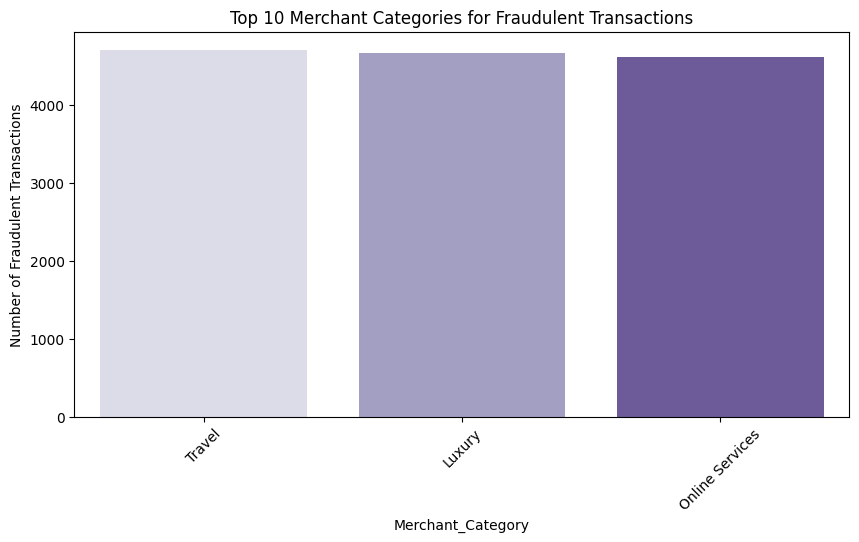

In [39]:
# Fraud by merchant category
fraud_merchant = df[df['Is_Fraud'] == 1]['Merchant_Category'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=fraud_merchant.index, y=fraud_merchant.values, hue =fraud_merchant.index, palette = "Purples", legend=False)
plt.title("Top 10 Merchant Categories for Fraudulent Transactions")
plt.xticks(rotation=45)
plt.ylabel("Number of Fraudulent Transactions")
plt.show()

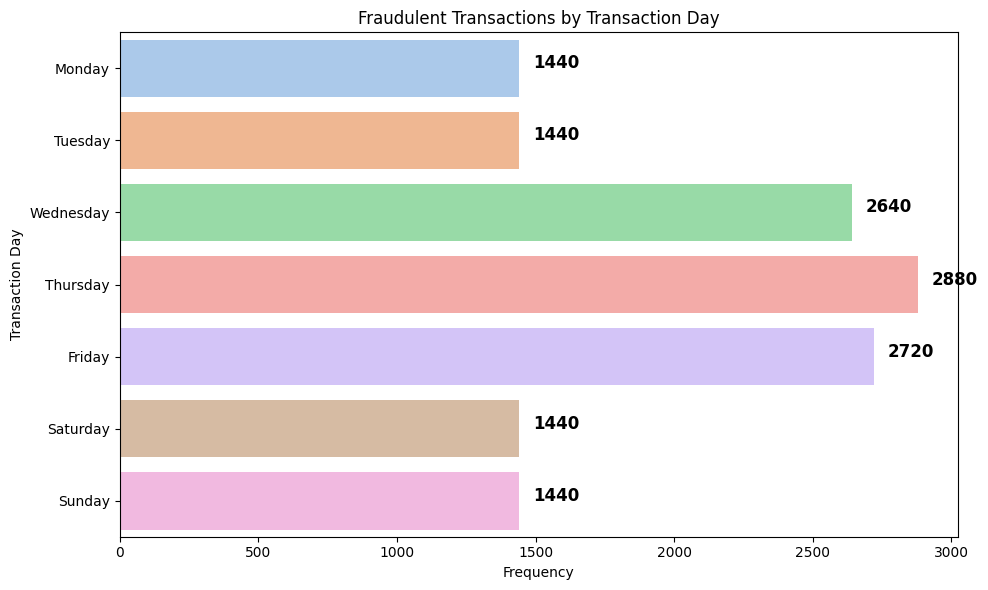

In [40]:
fraud_counts = fraud_df['Transaction_day'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    fill_value=0  # Ensuring all days are represented
)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=fraud_counts.index, x=fraud_counts.values, hue=fraud_counts.index, palette="pastel", legend=False)
plt.xlabel("Frequency")
plt.ylabel("Transaction Day")
plt.title("Fraudulent Transactions by Transaction Day")
for index, value in enumerate(fraud_counts.values):
    ax.text(value + 50, index, f"{value}", fontsize=12, fontweight="bold", ha="left")
plt.tight_layout()
plt.show()

Observations
- Thursday (2880 fraud cases) has the highest number of fraudulent transactions.
- Friday (2720 cases) and Wednesday (2640 cases) also see a higher number of fraud cases.
- Fraudulent activities increase mid-week (Wednesday–Friday), potentially due to higher transaction volumes. Lower fraud activity on weekends might indicate reduced banking or transaction activity.

# Bivariate Analysis

C:\Users\Palvi\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\Palvi\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\Palvi\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Transaction_Amount', ylabel='Age'>,
        <Axes: xlabel='Account_Balance', ylabel='Age'>,
        <Axes: xlabel='Is_Fraud', ylabel='Age'>,
        <Axes: xlabel='Transaction_year', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Transaction_Amount'>,
        <Axes: xlabel='Transaction_Amount', ylabel='Transaction_Amount'>,
        <Axes: xlabel='Account_Balance', ylabel='Transaction_Amount'>,
        <Axes: xlabel='Is_Fraud', ylabel='Transaction_Amount'>,
        <Axes: xlabel='Transaction_year', ylabel='Transaction_Amount'>],
       [<Axes: xlabel='Age', ylabel='Account_Balance'>,
        <Axes: xlabel='Transaction_Amount', ylabel='Account_Balance'>,
        <Axes: xlabel='Account_Balance', ylabel='Account_Balance'>,
        <Axes: xlabel='Is_Fraud', ylabel='Account_Balance'>,
        <Axes: xlabel='Transaction_year', ylabel='Account_Balance'>],
       [<Axes: xlabel='Age', ylabel='Is_Fraud'>,
        <Axes: xla

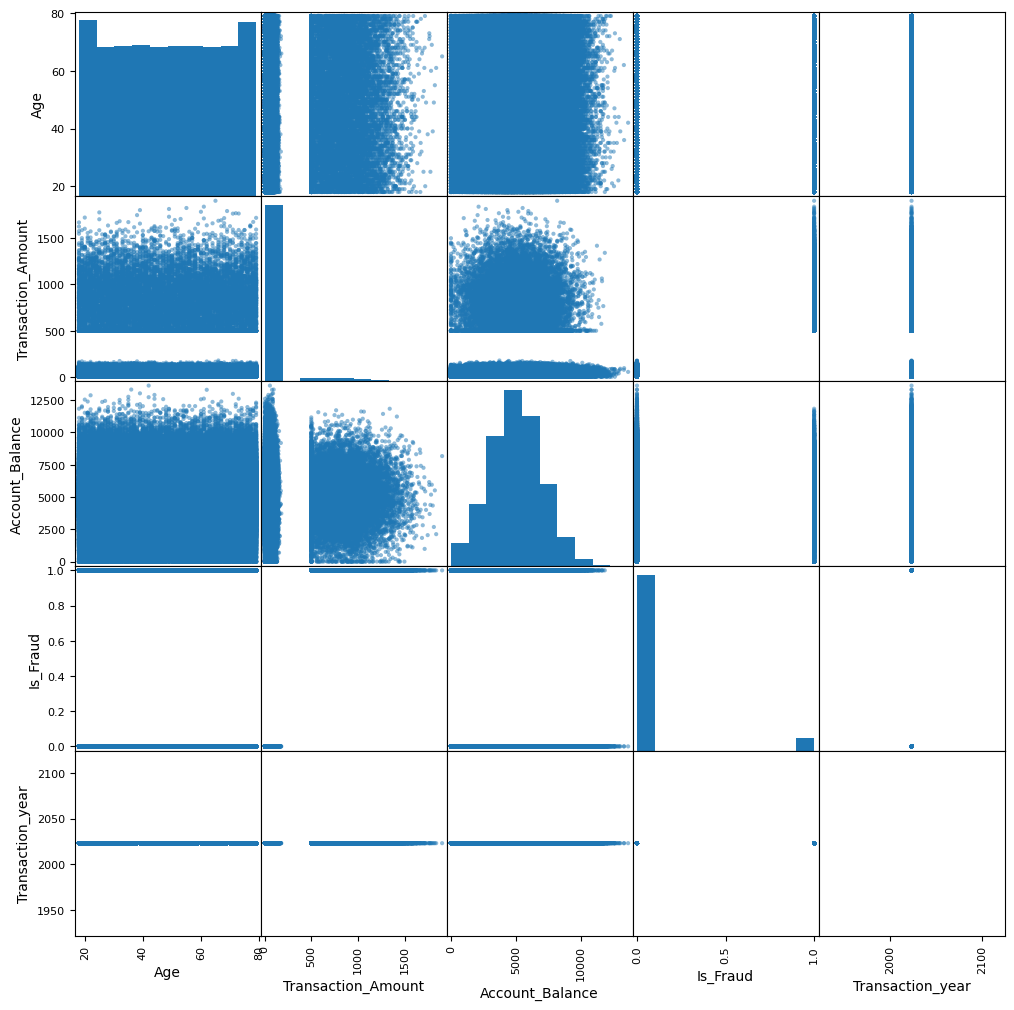

In [41]:
pd.plotting.scatter_matrix(df, figsize=(12,12))

**Observations**
1. Transaction Amount vs. Account Balance
Most transactions occur at lower amounts, with few high-value outliers.
Account balance follows a normal distribution, centered around mid-range values.

2. Age vs. Other Variables
Age distribution is uniform, except for peaks at both ends.
No clear pattern between age and transaction amount or fraud.

3. Fraudulent Transactions (Is_Fraud)
Fraud cases appear highly concentrated at specific points.
Fraud seems unrelated to age but may be linked to certain transaction behaviors.


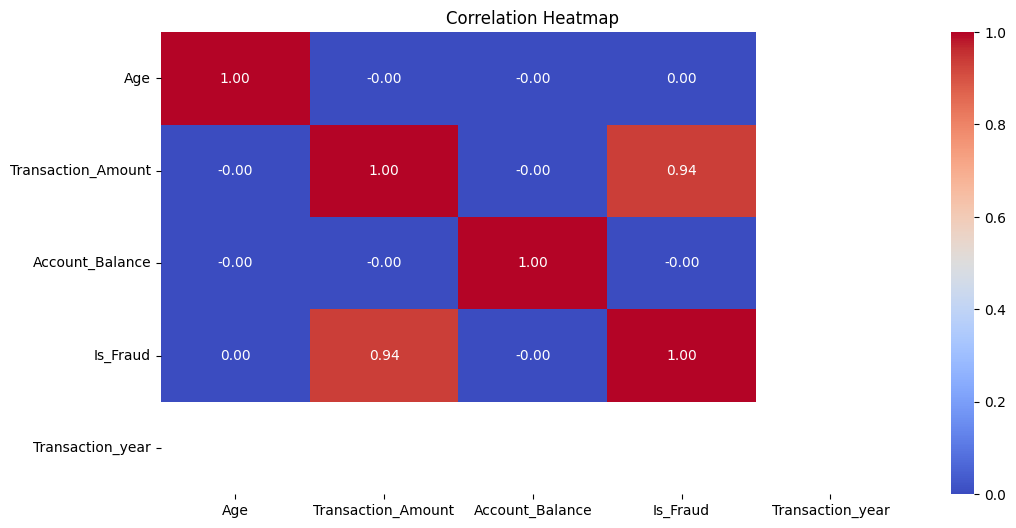

In [42]:
numeric_df = df.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Observations**
1. High Correlation Between Transaction_Amount and Is_Fraud (0.94)
Fraudulent transactions are strongly associated with higher transaction amounts.
Indicates that large transactions might be a key risk factor for fraud.

2. No Significant Correlation With Age or Account_Balance
Age and Account_Balance have near-zero correlations with fraud.
This suggests that fraudulent transactions occur across all age groups and account balances.

3. Transaction_Year Missing
The correlation matrix does not display Transaction_Year, possibly due to data type issues.
The column may be formatted as an object/string instead of a numerical or datetime type.

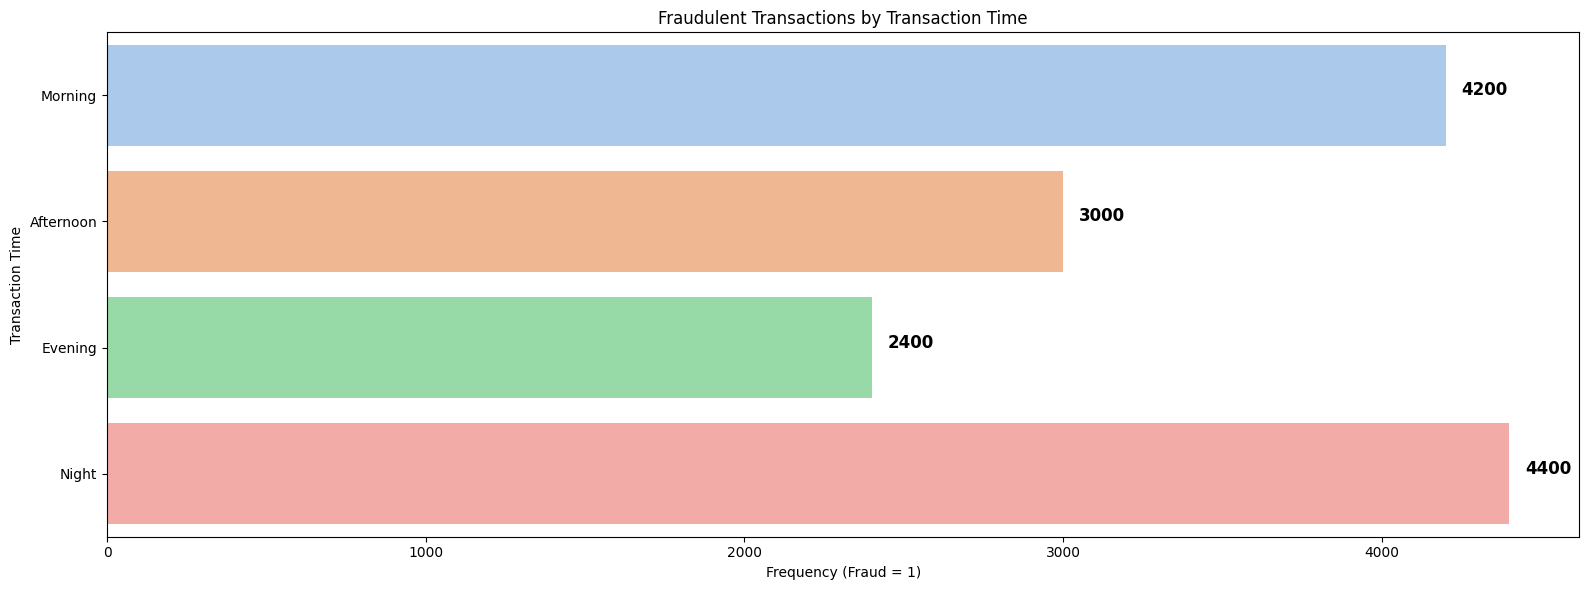

In [44]:
fraud_df = df[df['Is_Fraud'] == 1]

# Count occurrences for each transaction time category
fraud_counts = fraud_df['Transaction_Time'].value_counts().reindex(
    ['Morning', 'Afternoon', 'Evening', 'Night'], fill_value=0
)  

# Plot the data
plt.figure(figsize=(16, 6))
ax = sns.barplot(y=fraud_counts.index, x=fraud_counts.values, hue=fraud_counts.index, palette="pastel", legend = False)
plt.xlabel("Frequency (Fraud = 1)")
plt.ylabel("Transaction Time")
plt.title("Fraudulent Transactions by Transaction Time")
for index, value in enumerate(fraud_counts.values):
    ax.text(value + 50, index, f"{value}", fontsize=12, fontweight="bold", ha="left")
plt.tight_layout()
plt.show()


**Observations**
Most fraud occurs at Night and Morning. Higher fraud at night and early morning could indicate:
- Less oversight or weaker fraud detection during off-peak hours.
- Fraudsters exploiting late-night transaction patterns.
- Lower fraud in the evening may align with typical user behavior, reducing anomalies. 

# Multivariate Analysis

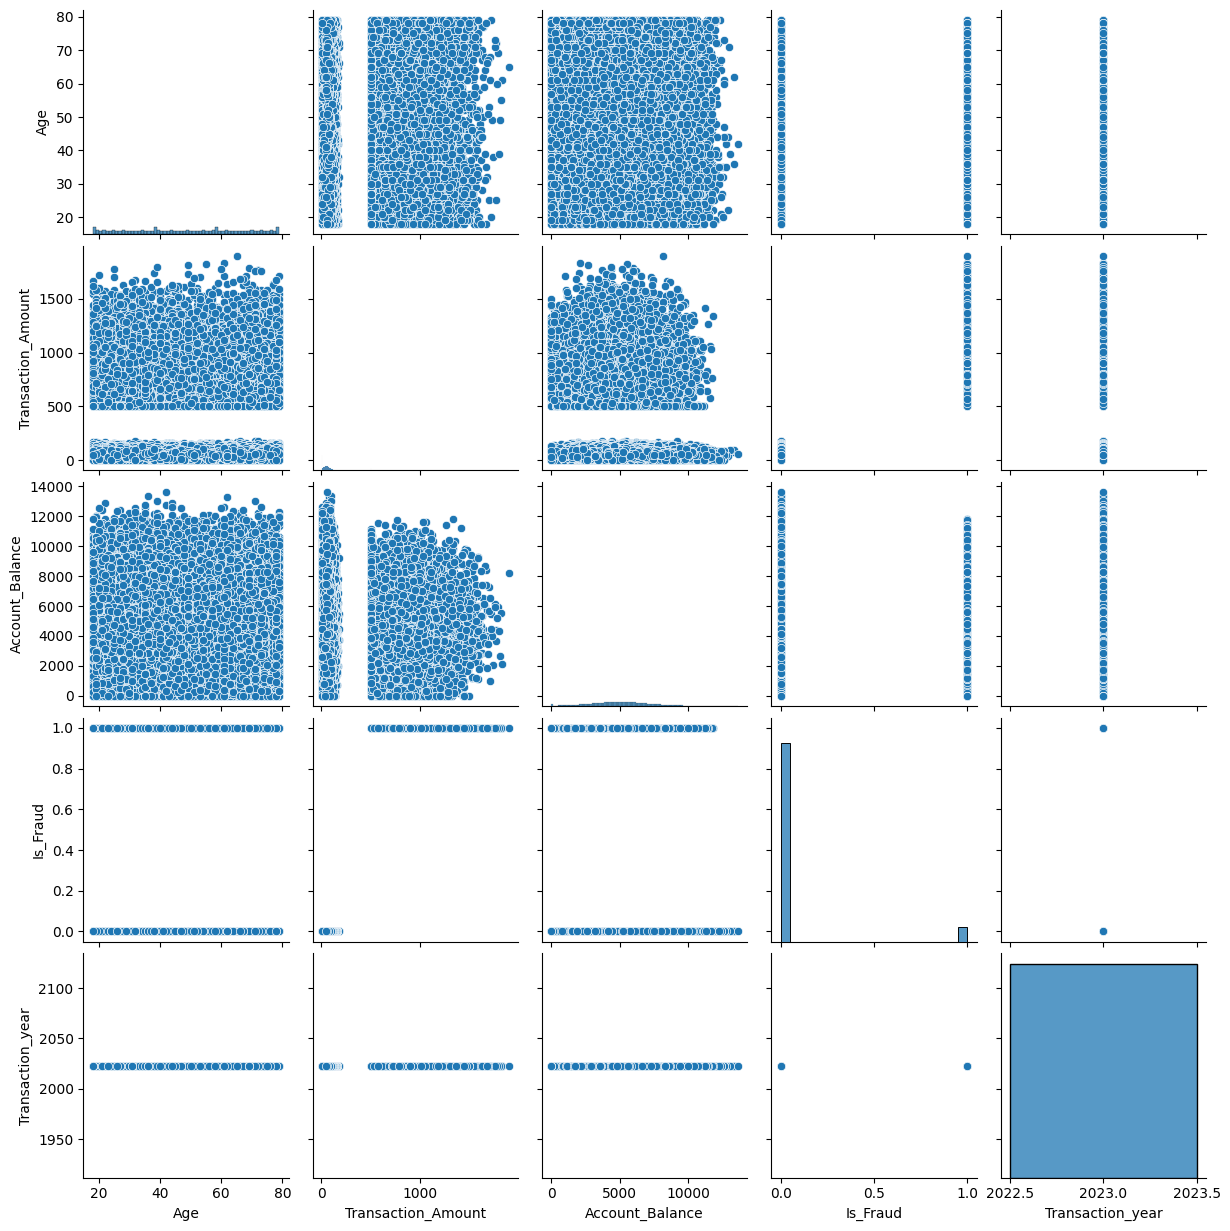

In [45]:
sns.pairplot(df)

# Relationship between Target and other Variables

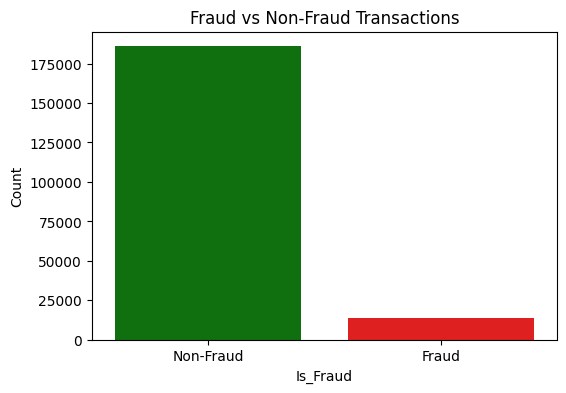

In [46]:
fraud_count = df['Is_Fraud'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_count.index, y=fraud_count.values, hue=fraud_count.index, palette=['green', 'red'], legend=False)
plt.title("Fraud vs Non-Fraud Transactions")
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.ylabel("Count")
plt.show()

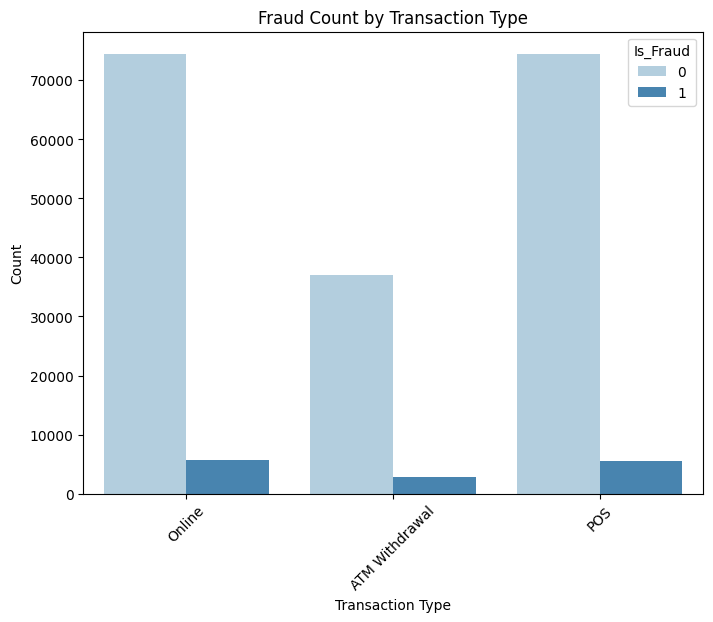

In [47]:
plt.figure(figsize=(8,6))
sns.countplot(x="Transaction_Type", hue="Is_Fraud", data=df, palette="Blues")
plt.title("Fraud Count by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Observations**\
Online and POS transactions have the highest fraud cases compared to ATM withdrawals.
Fraud occurs less frequently in ATM withdrawals, possibly due to stricter security measures (e.g., PIN verification, physical card presence).
Non-fraudulent transactions dominate across all transaction types, which aligns with the class imbalance in the dataset.
\
Online transactions are more vulnerable to fraud, likely due to card-not-present fraud, phishing, or compromised credentials.
POS transactions also show notable fraud cases, possibly due to stolen/cloned card usage.
ATM withdrawals are less frequently fraudulent, suggesting fraudsters prefer remote, anonymous methods over physical transactions.

# Outliers

Age                      Axes(0.125,0.11;0.133621x0.77)
Transaction_Amount    Axes(0.285345,0.11;0.133621x0.77)
Account_Balance        Axes(0.44569,0.11;0.133621x0.77)
Is_Fraud              Axes(0.606034,0.11;0.133621x0.77)
Transaction_year      Axes(0.766379,0.11;0.133621x0.77)
dtype: object

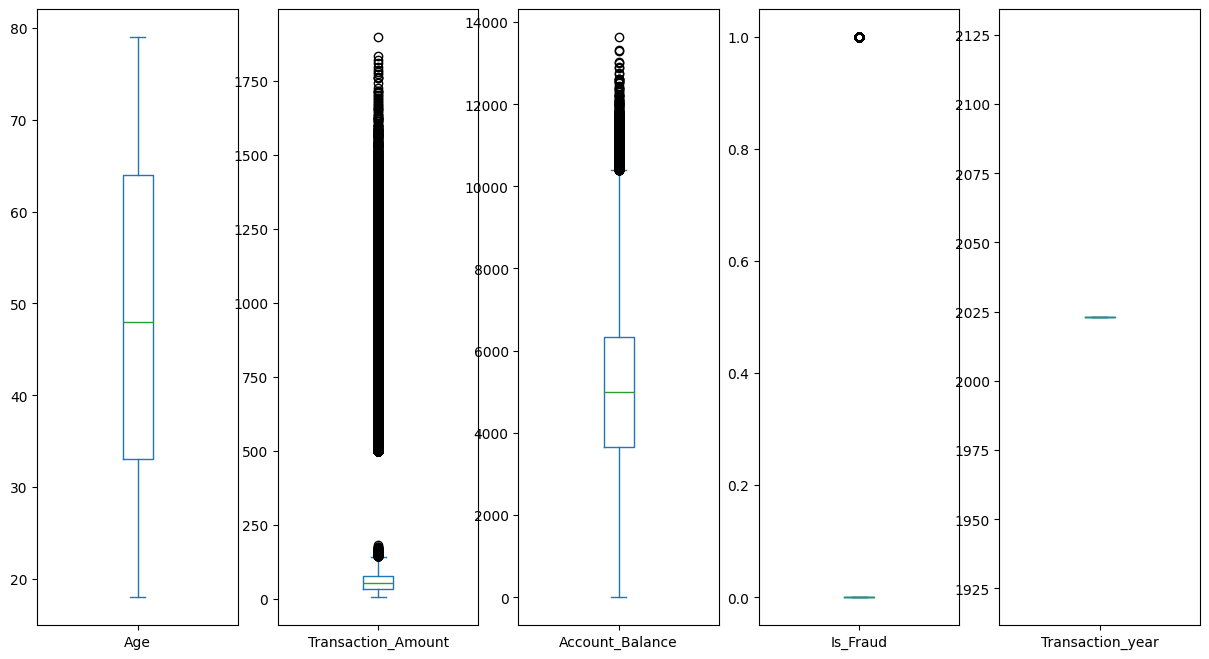

In [48]:
df.plot(kind='box', subplots=True, figsize=(15,8))

**Observations**
1. Age Distribution
The age distribution is fairly uniform, with no extreme outliers.
The median age is around 50 years, with a range from 20 to 80 years.

2. Transaction Amount
Numerous high-value outliers are present beyond the upper quartile.
Most transactions are of low value, but extreme cases reach over 1750.

3. Account Balance
The distribution is right-skewed, with a median balance of around 5000–6000.
A large number of outliers appear beyond 12,000, indicating a few users hold significantly higher balances.

4. Is_Fraud (Binary 0/1)
As expected, fraud cases are represented as 0 (non-fraud) and 1 (fraud).
The plot confirms the imbalance, with fraud cases being much fewer.

5. Transaction Year Anomaly
The Transaction Year values are unrealistic, with entries reaching beyond 2100.
This suggests a data formatting issue or incorrect parsing.

In [50]:
!pip install ydata_profiling

  Using cached pydantic-2.10.6-py3-none-any.whl.metadata (30 kB)
  Using cached jinja2-3.1.5-py3-none-any.whl.metadata (2.6 kB)
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.8 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
  Using cached htmlmin-0.1.12.tar.gz (19 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     ---------------------------------------- 57.7/57.7 kB 3.2 MB/s eta 0:00:00
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.1.31-py3-none-any.whl.metadata (2.5 kB)
  Using c

In [1]:
from ydata_profiling import ProfileReport

c:\Users\Palvi\anaconda3\envs\Test_Environment\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:

profile = ProfileReport(df, explorative=True)
profile.to_file("eda_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 17.38it/s]
